<div style="display: flex; background-color: RGB(90,90,100);" >
<h1 style="margin: auto; padding: 30px; font-size:3em;color:#fff; "> Détection automatique de faux billets </h1>
</div>

# Overview

### Step 1: Importing Libraries and Dependencies

### Step 2: Data Loading and Initial Exploration

### Step 3: Data Exploration and Value Counting

- **3.1**: Perform value counting for the 'is_genuine' column.
- **3.2**: Visualize distributions using boxplots based on 'is_genuine'.
- **3.3**: Detect outliers using IQR and Z-score methods.
- **3.4**: Generate a correlation heatmap to identify relationships between variables.
- **3.5**: Create a pairplot to visualize correlations among all features.
- **3.6**: Handle missing values using KN 'is_genuine'.
- **3.8**: Calculate grouped means based on 'is_genuine'.
- **3.9**: Perform PCA for correlation circle.
- **3.10**: Apply PCA for dimensionne vs Fake Bills).

### Step 4: Model Building and Evaluation

- **4.1**: Data Preprocessing and K-Means Clustering Inertia Plot
- **4.2**: Data Preprocessing and Model Evaluation
  - Prepare features and target for training.
  - Apply PCA for dimensionality reduction.
  - Train and evaluate four models:
    - Logistic Regression
    - K-Means Clustering (with k=2)
    - K-Nearest Neighbors (KNN)
    - Random Forest
  - Print model accuracy scores.
- **4.3**: Confusion Matrix Evaluation
- **4.4**: Model Evaluation with Residuals and Normality Check
- **4.5**: Model Prediction and False Prediction Counts
- **4.6**: Model Probability Predictions

### Step 5: User Input and Prediction Functions

- **5.1**: Define a function (`get_user_input()`) to accept user inputs for features (e.g., diagonal, height_left, height_right, margin_low, margin_up, length).
- **5.2**: Define a function (`process_input()`) to preprocess user input, apply PCA, and predict using Logistic Regression.
- **5.3**: Define a function (`preductFunction()`) to predict for new data from a CSV file, using scaling and PCA.
e Curve (AUC) to assess model distinction ability.

<div style="border: 1px solid RGB(90,90,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">Step 1: Importing Libraries and Dependencies</h3>
</div>

In [38]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#---------------------------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import decomposition
#---------------------------------------------------------------------------------------------------------------------------------------------

from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix


<div style="border: 1px solid RGB(90,90,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">Step 2: Data Loading and Initial Exploration</h3>
</div>

### **Loading Data**
--------------------

In [41]:
# Load the dataset
#F:/TP IA 1er annee/
Billets = pd.read_csv('billets.csv', delimiter=';')
Billets    

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


### Data Information and Summary

In [43]:
print("Info of the dataset:\n")
display(Billets.info())
print("///////////////////////////////////////////////////////////////")
print("\nmissing values:\n")
display(Billets.isna().sum())
print("///////////////////////////////////////////////////////////////")
print("\nunique values in each column:\n")
display(Billets.nunique())
print("///////////////////////////////////////////////////////////////")

# Check for non-numeric values in the 'length' column
non_numeric = Billets[~Billets['length'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)
# Check for duplicate 
print('Valeurs en doublon sur les données extraites du fichier billets : ' ,Billets.duplicated().sum())

Info of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


None

///////////////////////////////////////////////////////////////

missing values:



is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

///////////////////////////////////////////////////////////////

unique values in each column:



is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

///////////////////////////////////////////////////////////////
Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []
Valeurs en doublon sur les données extraites du fichier billets :  0


<div style="border: 1px solid RGB(90,90,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">Step 3:  Data Exploration and Value Counting.
</h3>
</div>

<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.1 Value Counting
</h3>

In [46]:
# the value counts of the 'is_genuine' column
print(Billets['is_genuine'].value_counts())
Billets['is_genuine'].shape[0]

is_genuine
True     1000
False     500
Name: count, dtype: int64


1500

In [47]:
# Calculate percentage distribution
Billets['is_genuine'].value_counts()*100/Billets['is_genuine'].shape[0]

is_genuine
True     66.666667
False    33.333333
Name: count, dtype: float64

<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.2 Boxplot Distribution of Variables 
</h3>

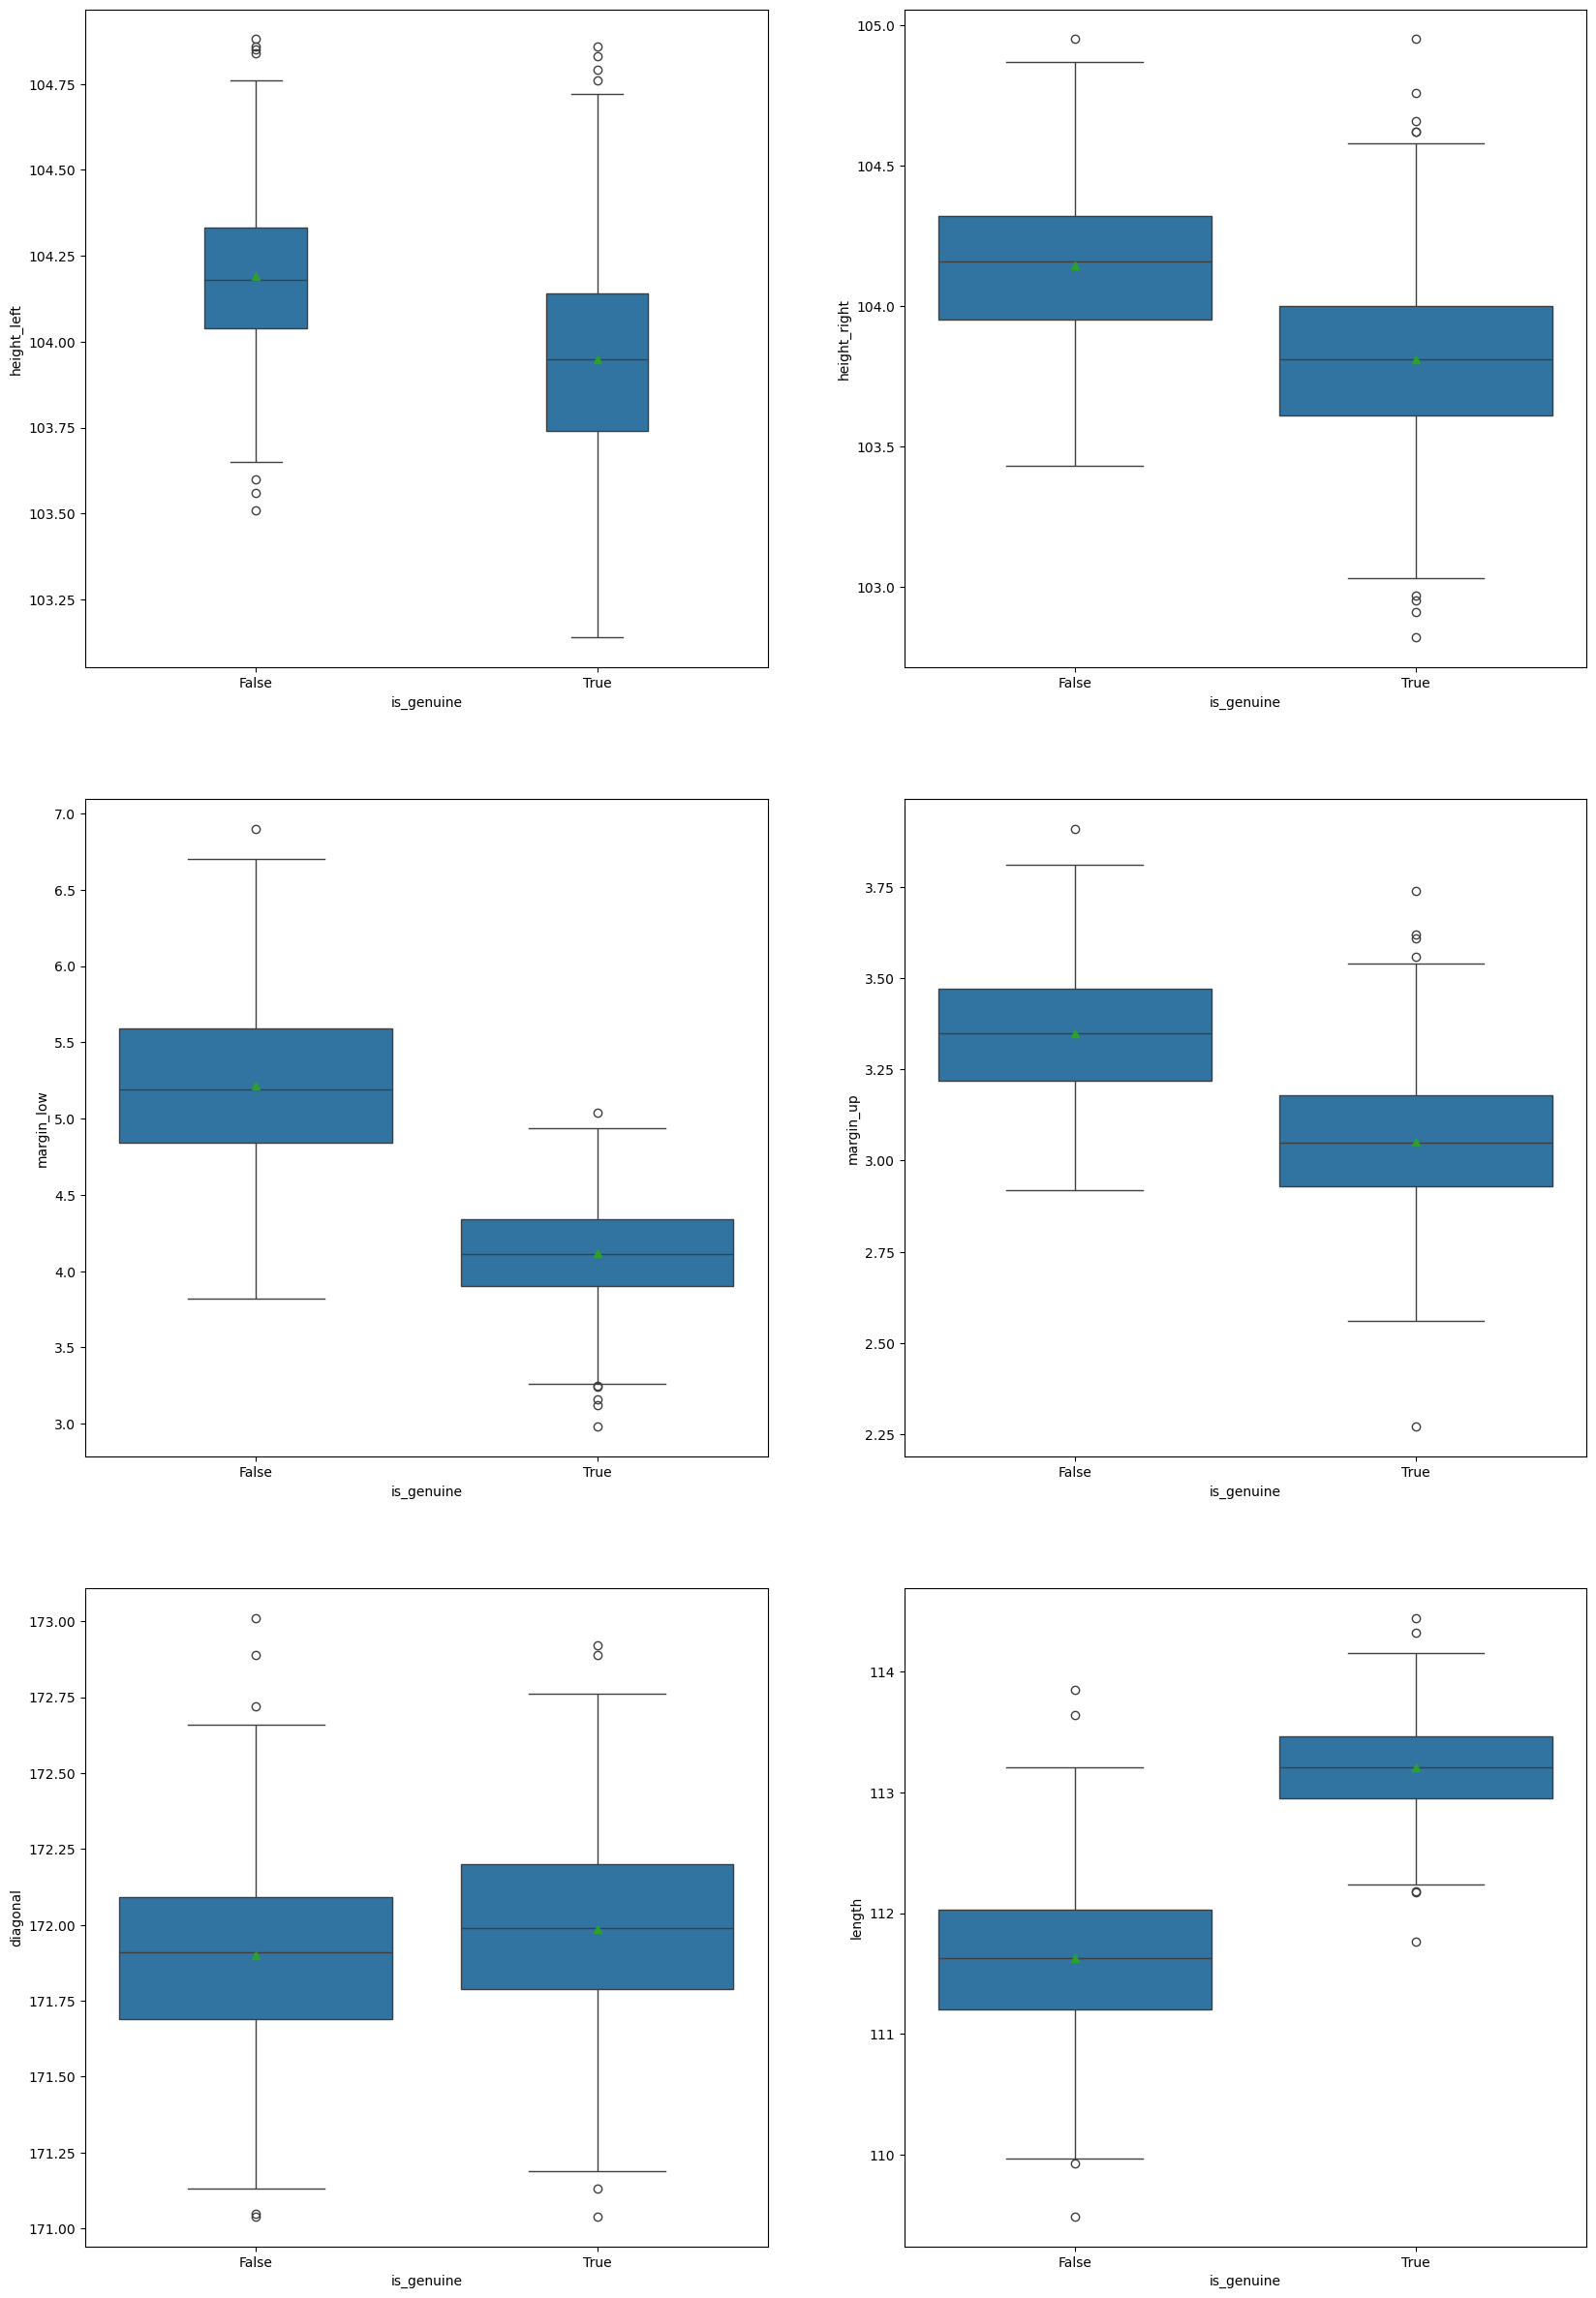

In [49]:
# Visualizing the distribution of variables with respect to 'is_genuine' using boxplots
plt.figure(figsize=(20, 30))
variables = Billets.columns[1:]
plt.subplot(321)
sns.boxplot(x='is_genuine', y='height_left', width=0.3, data=Billets, showmeans=True)
plt.subplot(322)
sns.boxplot(x='is_genuine', y='height_right', data=Billets, showmeans=True)
plt.subplot(323)
sns.boxplot(x='is_genuine', y='margin_low', data=Billets, showmeans=True)
plt.subplot(324)
sns.boxplot(x='is_genuine', y='margin_up', data=Billets, showmeans=True)
plt.subplot(325)
sns.boxplot(x='is_genuine', y='diagonal', data=Billets, showmeans=True)
plt.subplot(326)
sns.boxplot(x='is_genuine', y='length', data=Billets, showmeans=True)
plt.show()

<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.4 Correlation Heatmap
</h3>

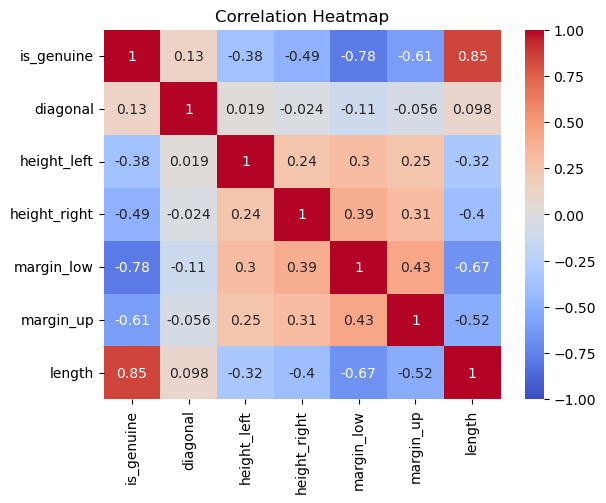

In [51]:
#a heatmap of correlations between all features
correlation_matrix = Billets.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.5 Pairplot Visualization of Correlations
</h3>


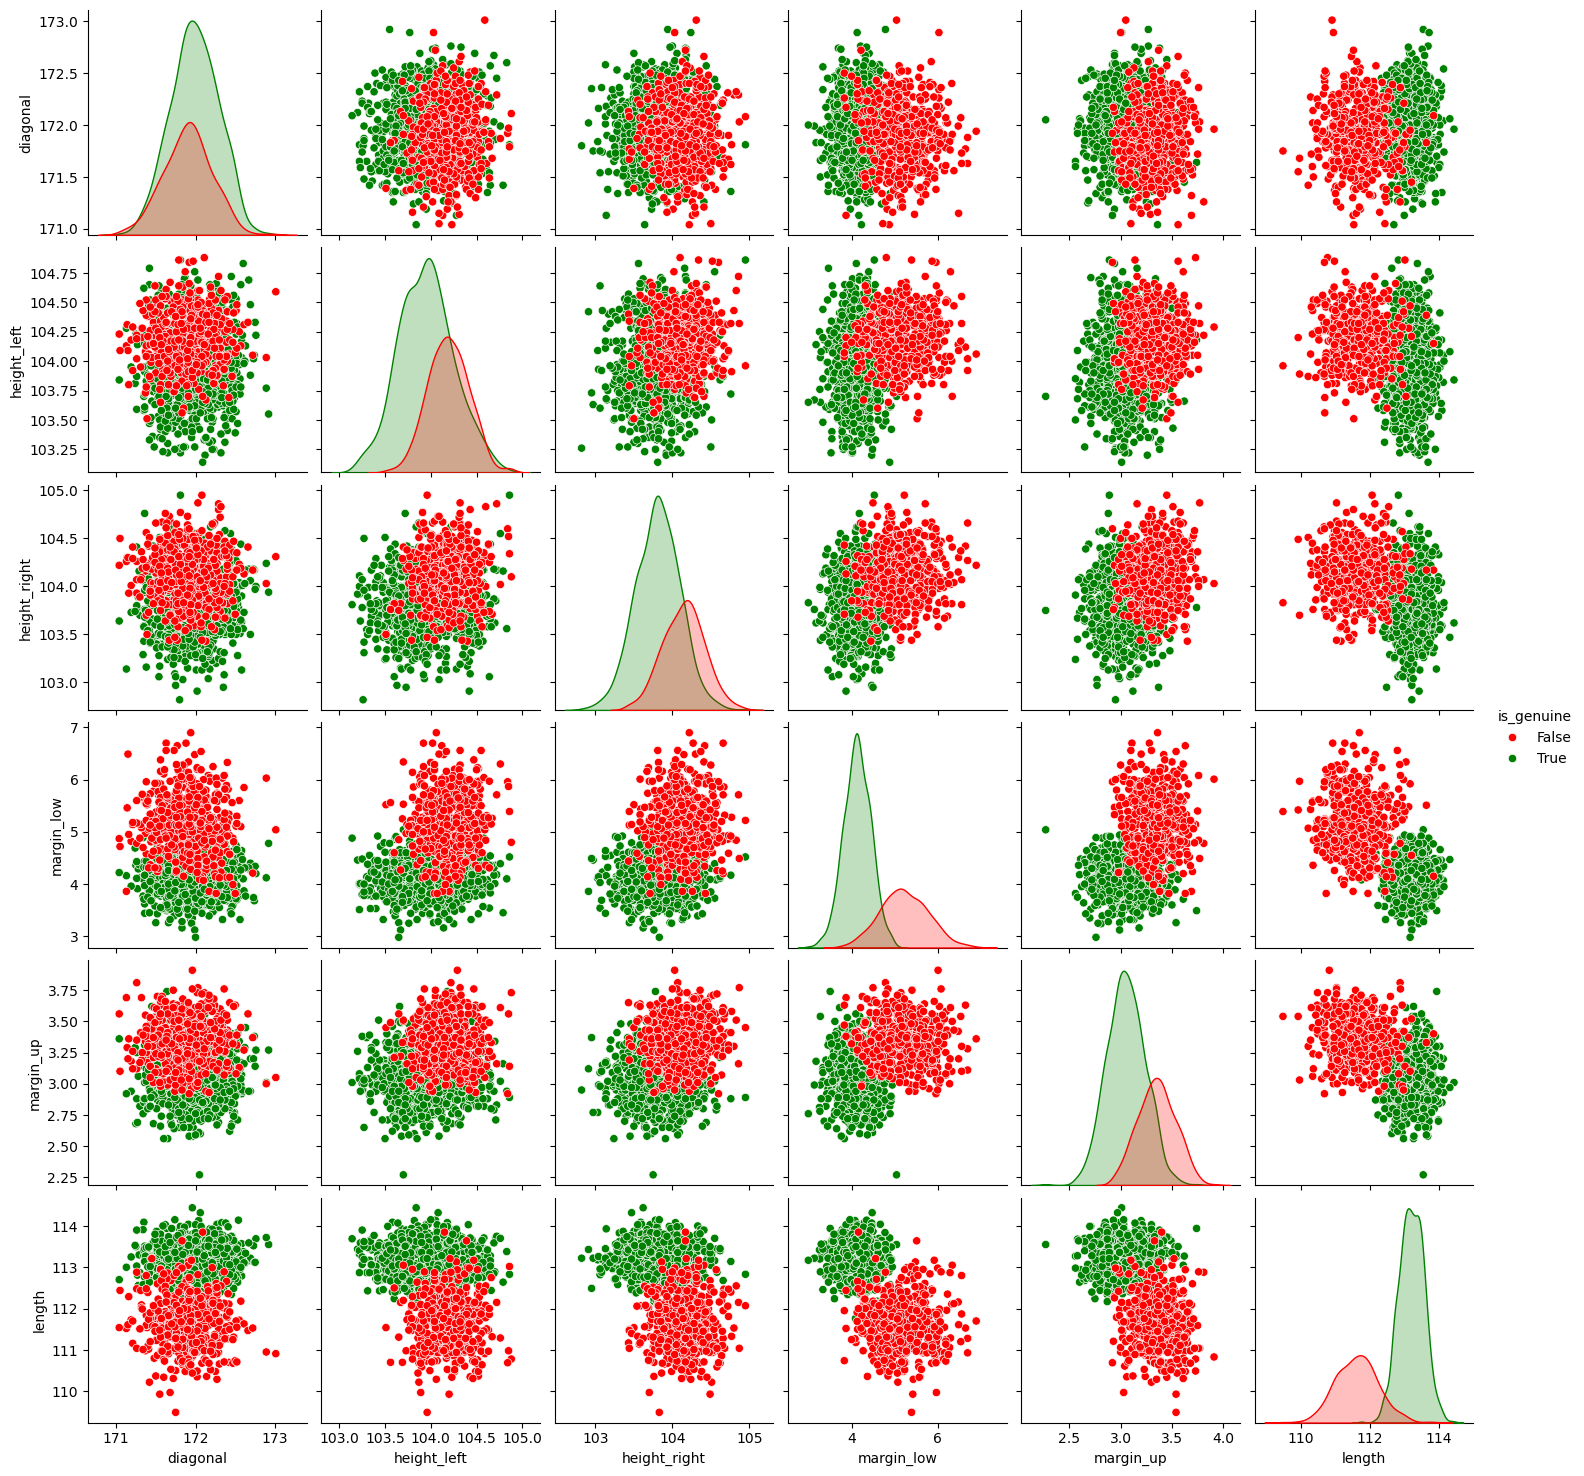

In [53]:
# Visualize the relationships between features 
sns.pairplot(Billets, hue='is_genuine', palette ={True :'green', False :'red'})
plt.show()
#-------------------------------------------------------------------

<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.6 Handling Missing Data with KNN Imputation
</h3>

In [55]:
# Prepare the feature set for imputation

features = ['length', 'height_left', 'height_right', 'margin_low', 'margin_up', 'diagonal']
Billets_features = Billets[features]

# Apply KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # يمكنك تغيير عدد الجيران حسب الحاجة
Billets_filled = knn_imputer.fit_transform(Billets_features)

# Update the dataset with imputed values
Billets[features] = Billets_filled

# Verify that all missing values have been imputed
print("Missing values after KNN Imputation:")
print(Billets.isna().sum())


Missing values after KNN Imputation:
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


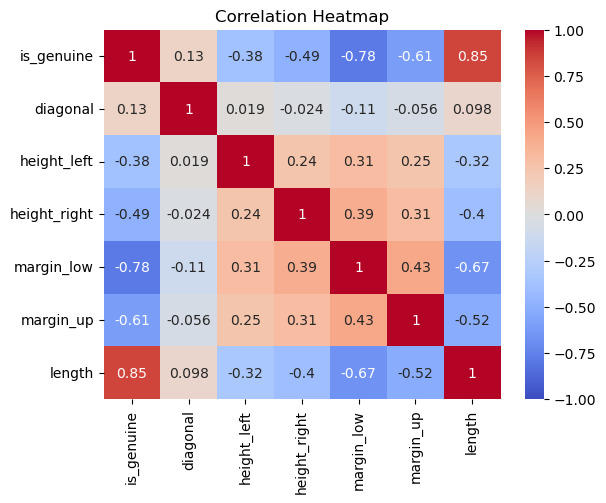

In [56]:
correlation_matrix = Billets.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.8 Grouped Means by 'is_genuine'
</h3>

In [58]:
# Calculate and display the means of features grouped by 'is_genuine'
grouped_means = Billets.groupby('is_genuine').mean()
grouped_means

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,5.216100,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.120016,3.05213,113.20243


<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.9 Principal Component Analysis (PCA) - Correlation Circle
</h3>

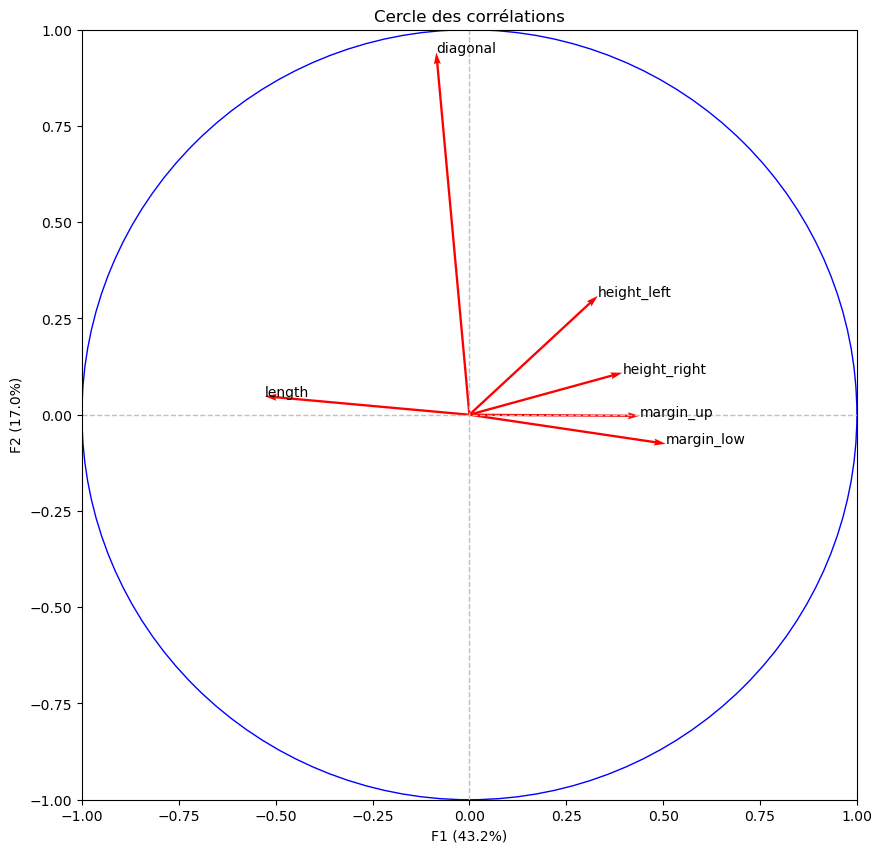

In [60]:
# Apply PCA to reduce the dataset to 2 components
X = Billets.drop('is_genuine', axis=1).copy()
X_scaled = preprocessing.StandardScaler().fit_transform(X)
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

pcs = pca.components_
#--------------------------------------------------------

# Plot the correlation circle
fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, Billets.iloc[:,1:].columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.show()



<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">3.10 PCA for Dimensionality Reduction
</h3>

Explained Variance Ratio: [0.43195223 0.1696165  0.1302177 ]
Total Variance Explained: 0.7317864208479137


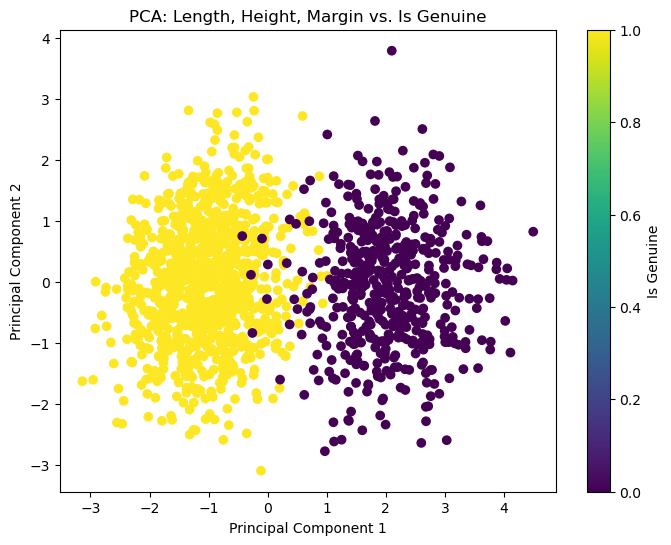

In [62]:
X = Billets[['length', 'height_left', 'height_right', 'margin_low', 'margin_up', 'diagonal']]
#-----------------------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
#-----------------------------------------------------------------------------------
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))
#-----------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Billets['is_genuine'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Length, Height, Margin vs. Is Genuine')
plt.colorbar(label='Is Genuine')
plt.show()


<div style="border: 1px solid RGB(90,90,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">Step 4: Model Building and Evaluation</h3>
</div>

<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">4.1 Data Preprocessing and K-Means Clustering Inertia Plot
</h3>

In [65]:
####################
#Data Preprocessing#
####################
X = Billets.drop('is_genuine', axis=1).copy()
y = Billets['is_genuine']
y = y.replace([True, False], [1,0])
# Scaling the feature values

X_scaled = preprocessing.StandardScaler().fit_transform(X)

C:\Users\CabCom\AppData\Local\Temp\ipykernel_24240\756946022.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace([True, False], [1,0])


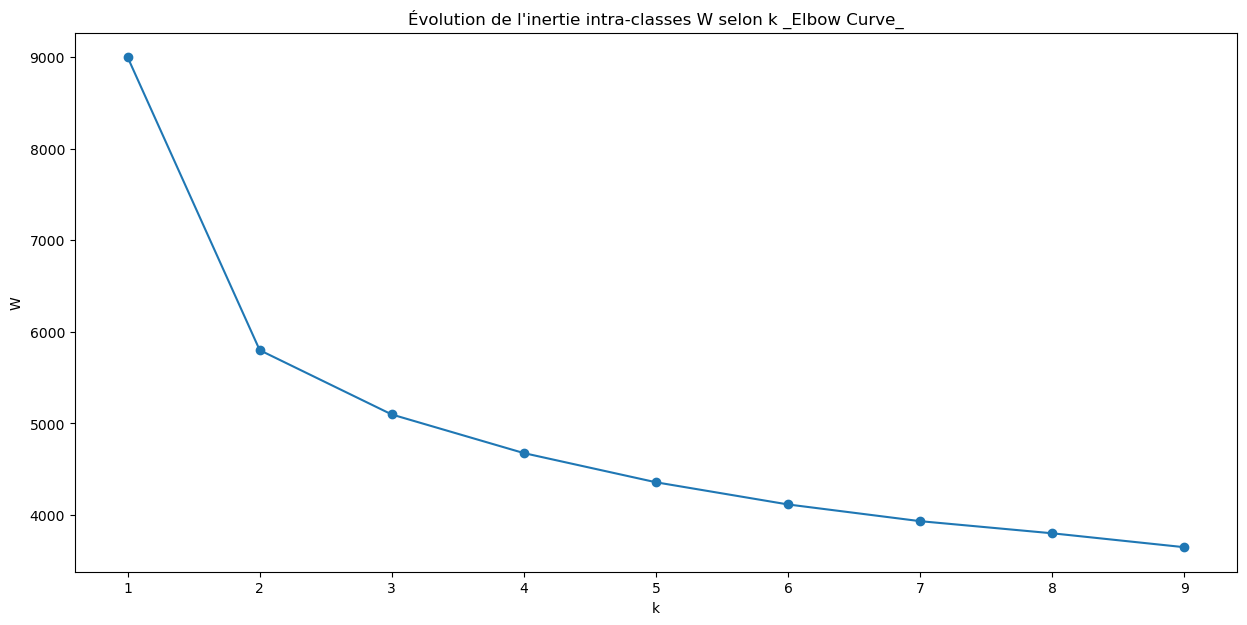

In [66]:

# List to store inertia values for different k values
inerties=[]

# Loop to test values of k from 1 to 9
for k in range(1, 10):
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    inerties.append(km.inertia_)

# Plotting inertia values for each k
plt.figure(figsize=(15, 7))
plt.plot(range(1, 10), inerties, marker='o')
plt.xlabel('k')
plt.ylabel('W')
plt.title("Évolution de l'inertie intra-classes W selon k _Elbow Curve_")

plt.show()


<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">4.2 Data Preprocessing and Model Evaluation
</h3>

In [68]:
#####################
# Data Preprocessing#
#####################
features = Billets.drop(columns=["is_genuine"])
labels_actual = Billets['is_genuine']  
#------------------------------------
features = Billets.drop(columns=["is_genuine"])  
labels = Billets["is_genuine"] 

# Standardization: Scaling the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
data_standardized = scaler.fit_transform(features)

# PCA: Dimensionality reduction to 3 components for visualization or efficiency
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

In [69]:
################################
# Model Training and Evaluation#
################################
from imblearn.over_sampling import SMOTE
import pickle
# 1. Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(data_pca ,labels_actual, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)



logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)
#--------------------------------------------------------------------------------------------------------------------------------------------------------

# 2. KMeans 

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_train)

y_pred_kmeans = kmeans.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
#--------------------------------------------------------------------------------------------------------------------------------------------------------

# 3. KNN 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
#--------------------------------------------------------------------------------------------------------------------------------------------------------
# 4. Random Forest
#Random_Forest = RandomForestClassifier(random_state=42, n_estimators=50)

Random_Forest= RandomForestClassifier(random_state=42, n_estimators=30, max_depth=10, max_features='sqrt', min_samples_leaf=5,min_samples_split=20)
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


# حفظ النموذج في ملف
with open('random_forest_model1.pkl', 'wb') as file:
    pickle.dump(Random_Forest, file)


#--------------------------------------------------------------------------------------------------------------------------------------------------------

# Results:
#--------
results = {
    "KNN": accuracy_knn,
    "Logistic Regression": accuracy_logreg,
    "Random Forest": accuracy_rf,
    "k means":accuracy_kmeans
}

# Print the accuracy for each model
for model, accuracy in results.items():
    print(f"{model}: Accuracy = {accuracy:.2f}")
    
#--------------------------------------------------------------------------------------------------------------------------------------------------------
# Select the best model based on accuracy
#best_model = max(results, key=results.get)
#print(f"\nthe better model : {best_model}")


KNN: Accuracy = 0.98
Logistic Regression: Accuracy = 0.99
Random Forest: Accuracy = 0.99
k means: Accuracy = 0.99


<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">4.3 Confusion Matrix Evaluation
</h3>

**Confusion Matrix for Random Forest Model**

In [72]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[109   1]
 [  2 188]]


**Confusion Matrix for Logistic Regression Model**

In [74]:

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[109   1]
 [  3 187]]


**Confusion Matrix for KNN Model**

In [76]:

conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[109   1]
 [  4 186]]


**Confusion Matrix for KMeans Model**

In [78]:

conf_matrix = confusion_matrix(y_test, y_pred_kmeans)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[109   1]
 [  3 187]]


<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">4.4 Model Evaluation with Residuals and Normality Check
</h3>

Accuracy: 0.9900
Durbin-Watson: 1.9949914710615435


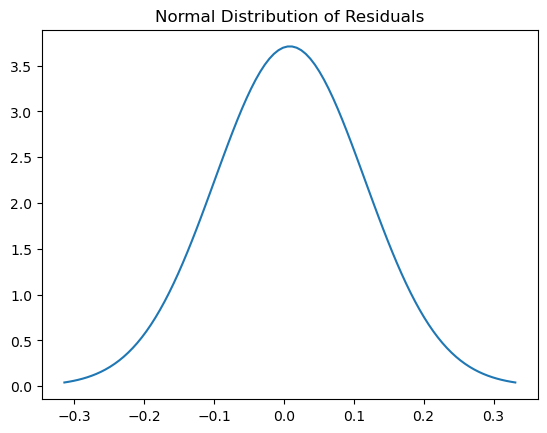

In [80]:
# Predicting probabilities for Random Forest model
y_pred_prob = Random_Forest.predict_proba(X_test)[:, 1]  

# Calculating the accuracy of the Random Forest model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Calculating residuals
resid = y_test - y_pred_prob
print("Durbin-Watson:", float(durbin_watson(resid)))

# Plotting the normal distribution of residuals
mu = np.mean(resid)
sigma = np.std(resid, ddof=1)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Normal Distribution of Residuals')
plt.show()




<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">4.5 Model Prediction and False Prediction Counts
</h3>

In [82]:
# Select the relevant features from the new data
NEW_DATA= Billets
data = NEW_DATA[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length" ]]

#--------------------------------------------------------------------------------------------------------------------------------------------------------
##########################
#Prediction for New Data:#
##########################

# Standardize the new data using the previously fitted scaler
new_data_normalized = scaler.transform(data)

# Apply PCA transformation on the standardized data
new_data_pca = pca.transform(new_data_normalized)

# Make predictions using Random Forest and Logistic Regression models
rf_preduction=Random_Forest.predict(new_data_pca)
logreg_preduction=logreg.predict(new_data_pca)

# Count the number of false predictions for both models
#print("false predection random forest :", NEW_DATA[rf_preduction!=Billets['is_genuine']].count())
#print("false predection  L_regresion :", NEW_DATA[logreg_preduction!=Billets['is_genuine']].count())

#--------------------------------------------------------------------------------------------------------------------------------------------------------
#################################
#Adding Predictions to New Data:#
#################################

# Add the predictions from Random Forest to the new data
NEW_DATA['predection']=Random_Forest.predict(new_data_pca)

#--------------------------------------------------------------------------------------------------------------------------------------------------------
# Uncomment to check the data with incorrect predictions
#NEW_DATA[NEW_DATA['predection']!=Billets['is_genuine']]
#NEW_DATA[rf.predict(new_data_pca)!=Billets['is_genuine']]
#rf.predict(new_data_pca)

<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">4.6 Model Probability Predictions
</h3>

In [84]:
# Get the probability predictions for the new data using Logistic Regression
proba_logreg = logreg.predict_proba(new_data_pca)[:, 1]

# Get the probability predictions for the new data using Random Forest
proba_rf = Random_Forest.predict_proba(new_data_pca)[:, 1]

# Add the probability predictions from Random Forest to the new data
NEW_DATA['probabilite']=Random_Forest.predict_proba(new_data_pca)[:, 1]

# Display a sample of 10 rows from the new data to view the results
NEW_DATA.sample(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,predection,probabilite
69,True,171.98,104.16,103.76,4.080,2.94,113.08,True,1.000000
1263,False,171.59,104.05,104.40,5.050,3.45,111.14,False,0.018667
287,True,171.92,104.12,104.15,3.830,2.88,112.65,True,1.000000
775,True,172.53,104.29,103.87,4.170,2.98,112.64,True,0.951852
1130,False,171.56,104.29,104.19,5.230,3.63,112.94,False,0.000000
1286,False,171.93,104.24,103.71,5.480,3.16,111.84,False,0.000581
836,True,172.52,103.98,103.74,4.660,3.19,113.44,True,1.000000
437,True,171.65,103.88,103.59,3.940,3.05,113.28,True,0.996970
197,True,171.45,103.66,103.80,4.106,3.62,113.27,True,0.934208
1235,False,172.27,103.87,104.35,5.580,3.52,112.32,False,0.018019


### **ROC Curve and AUC Calculation**

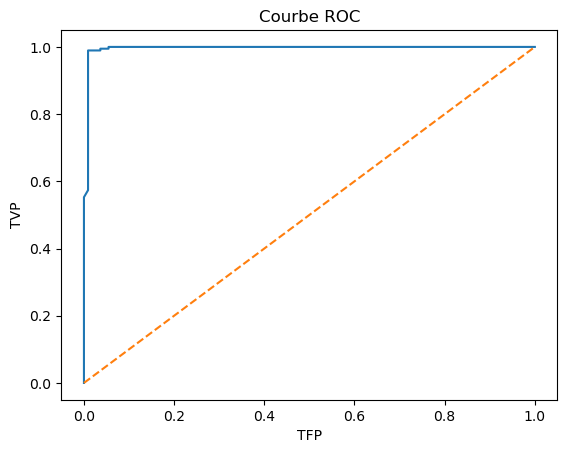

In [86]:
# Get the probability predictions for the positive class from Logistic Regression
y_prob = logreg.predict_proba(X_test)[:,1] 
# Get the probability predictions for the positive class from Random Forest
proba_rf = Random_Forest.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba_rf)

metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('TFP')
plt.ylabel('TVP')
plt.title('Courbe ROC')
plt.show()

<div style="border: 1px solid RGB(90,90,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(100,100,100); ">Step 5: User Input and Prediction Functions </h3>
</div>

In [88]:
# Function to get user input and create a DataFrame
def get_user_input():
    
        diagonal = float(input("Enter diagonal: "))
        height_left = float(input("Enter height_left: "))
        height_right = float(input("Enter height_right: "))
        margin_low = float(input("Enter margin_low: "))
        margin_up = float(input("Enter margin_up: "))
        length = float(input("Enter length: "))
        
        data = np.array([[diagonal, height_left, height_right, margin_low, margin_up,length ]])
    
        data = pd.DataFrame([[diagonal, height_left, height_right, margin_low, margin_up, length]],
                        columns=["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"])
    
        return data

#--------------------------------------------------------------------------------------------------------------------------------------------------------
# Function to process the input data, scale it, and make a prediction using Logistic Regression
def process_input(data, scaler, pca, model):
       
        new_data_normalized = scaler.transform(data)
    
        new_data_pca = pca.transform(new_data_normalized)
        prediction =model.predict(new_data_pca)
        if prediction[0] == 1 :
          result = "Genuine"  
        else :
            result ="Fake"
           
#user_data = get_user_input()
#process_input(user_data, scaler, pca, Random_Forest)



In [89]:
import pickle
# Function to predict the class for new data from a CSV file
#with open('random_forest_model.pkl', 'rb') as file:
#    rf_loaded = pickle.load(file)


def preductFunction (file_url,scaler,pca):
    New_data = pd.read_csv(file_url, delimiter=',')
    features = New_data.drop(columns=["id"])
    
    new_data_normalized = scaler.transform(features)
    new_data_pca = pca.transform(new_data_normalized)
    New_data['predection']=Random_Forest.predict(new_data_pca)
    New_data['probabilite']=Random_Forest.predict_proba(new_data_pca)[:, 1]
    #New_data['predection']=rf.predict(new_data_pca)
    #New_data['probabilite']=rf.predict_proba(new_data_pca)[:, 1]
    return New_data

In [90]:
preductFunction ('billets_test (8).csv',scaler,pca)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,predection,probabilite
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True,0.962399
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False,0.065255
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True,1.000000
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False,0.000581
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,False,0.000581
